# Synthetic Control

In [1]:
import arviz as az
import matplotlib.pyplot as plt

from causalpy.simulate_data import generate_synthetic_control_data
# from causalpy.models import SyntheticControl

In [2]:
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = 'retina'

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
treatment_time = 70
df, weightings_true = generate_synthetic_control_data(treatment_time=treatment_time)

# SPLIT INTO OBSERVED PRE-TREATMENT DATA
data = (df[df.index < treatment_time]
        .loc[:,["a", "b", "c", "d", "e", "f", "g", "actual"]])
# SPLIT INTO OBSERVED POST-TREATMENT DATA
predict_data = (df[df.index >= treatment_time]
                .loc[:,["a", "b", "c", "d", "e", "f", "g", "actual"]])

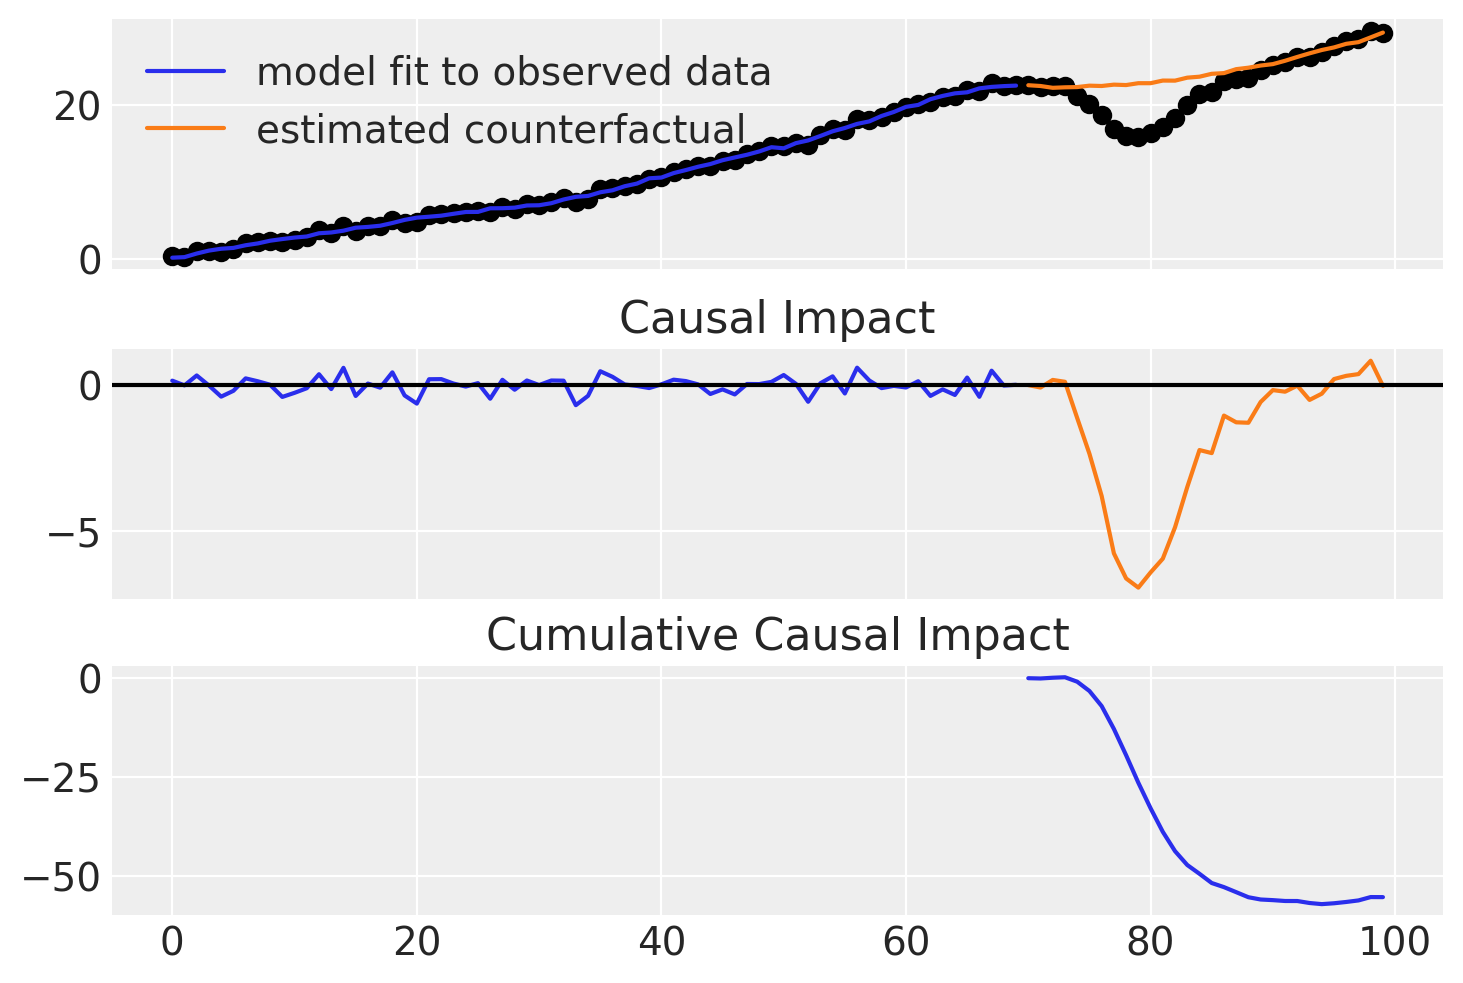

In [5]:
from causalpy.skl_experiments import SyntheticControl
from sklearn import linear_model

model = linear_model.LinearRegression()
thing = SyntheticControl(data, 
                         predict_data, 
                         target_col="actual",
                         controls=["a", "b", "c", "d", "e", "f", "g"],
                         prediction_model=model)

thing.plot()

## Generate simulated dataset

In [4]:
treatment_time = 70
df, weightings_true = generate_synthetic_control_data(treatment_time=treatment_time)
df.head()

,a,b,c,d,e,f,g,counterfactual,causal effect,actual
0,-2.416293,-2.333028,0.354088,-0.192415,0.428678,-1.779740,0.502057,-0.061861,-0.0,0.123226
1,-2.080757,-2.321879,0.752834,0.025882,0.601831,-1.309901,1.343293,0.224385,-0.0,0.121432
2,-1.984106,-1.501628,1.269160,-0.487457,0.974925,-1.627619,1.424191,0.511795,-0.0,0.287766
3,-2.088251,-1.744076,1.263940,-0.384832,1.045145,-1.207926,1.819209,0.799379,-0.0,1.380255
4,-2.500036,-1.660737,1.945311,-0.742410,0.679494,-0.967973,2.158410,1.086441,-0.0,1.097996


Create some useful visualisations

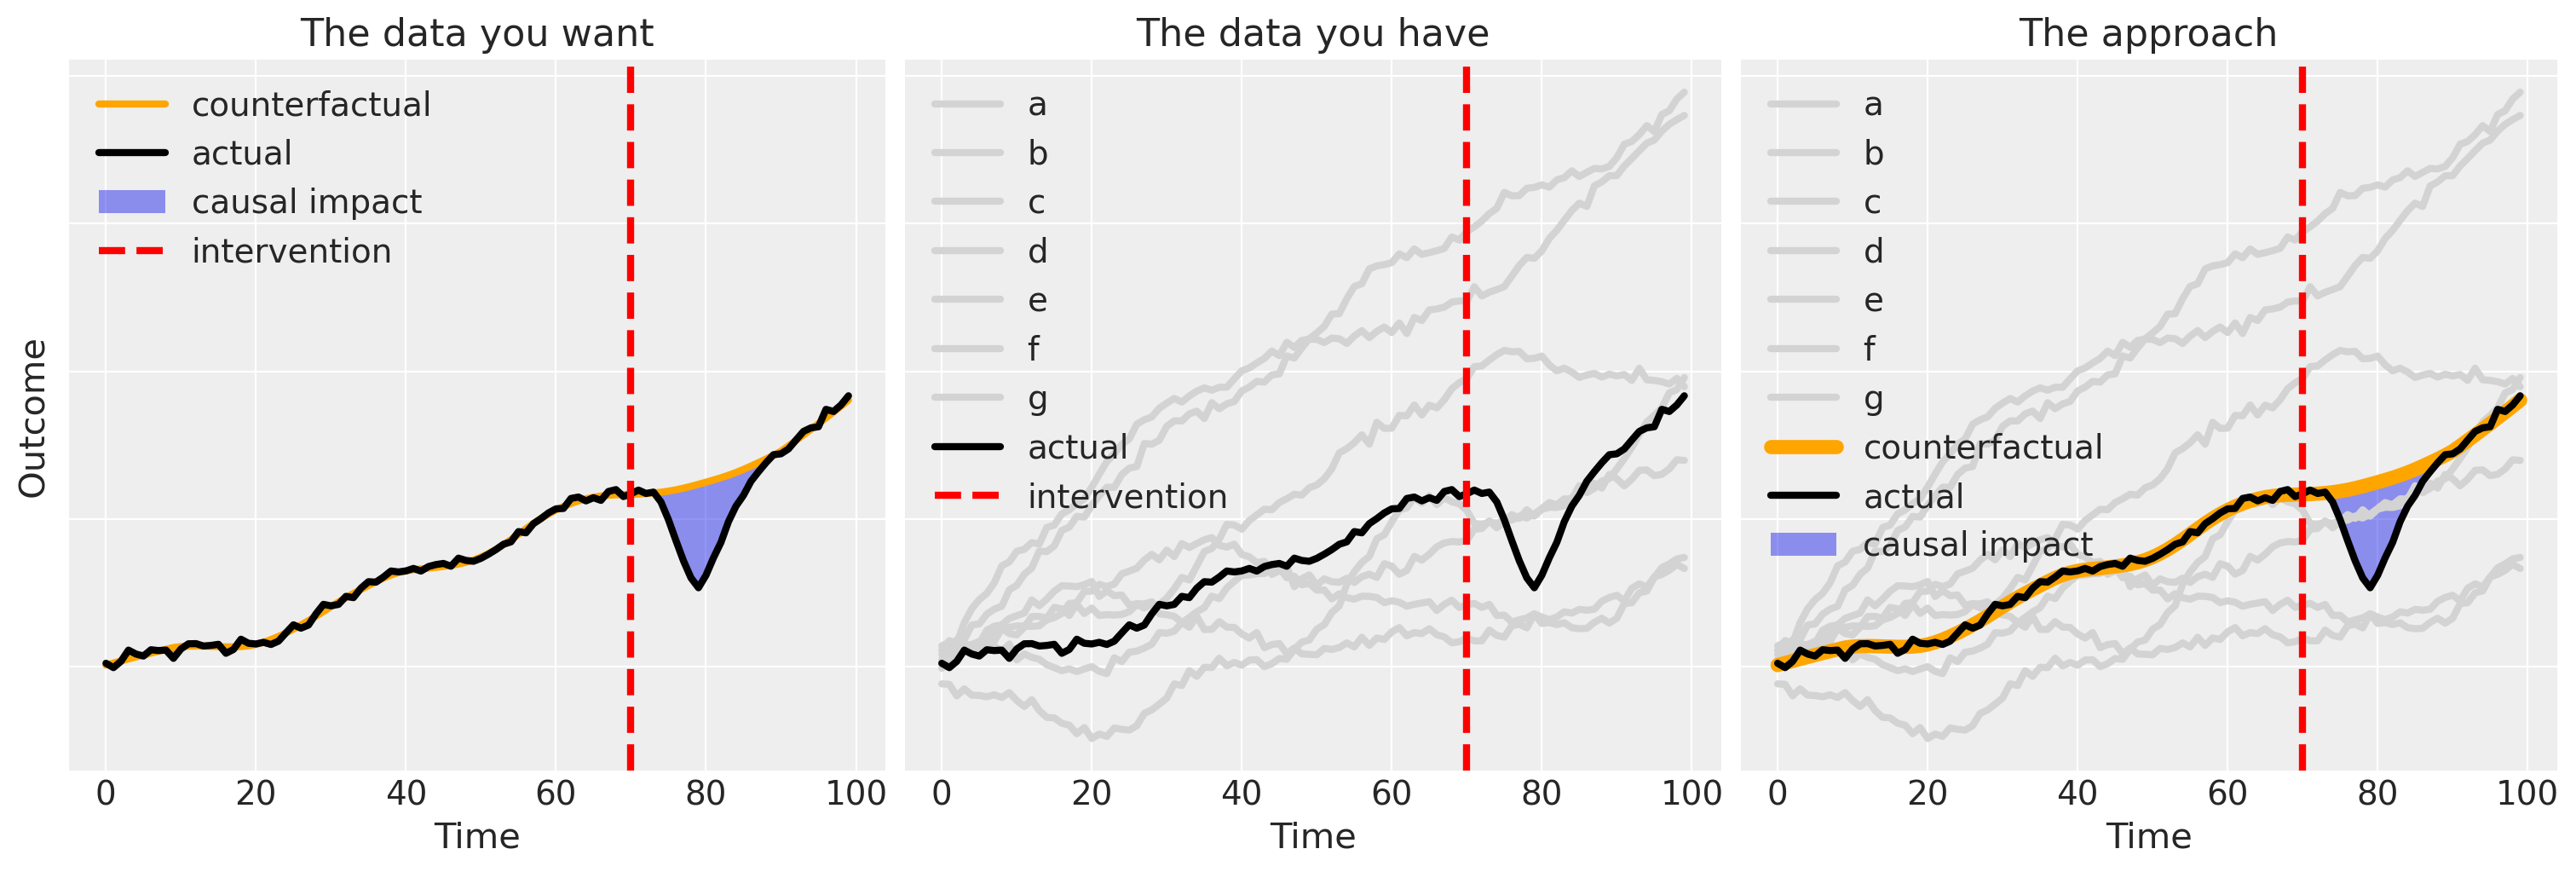

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# WHAT YOU WANT
df.loc[:, ['counterfactual']].plot(c='orange', lw=3, ls="-", ax=ax[0])
df.loc[:, ['actual']].plot(c='k', ax=ax[0], lw=3)
ax[0].fill_between(df.index, df['counterfactual'], df['actual'], alpha=0.5, label='causal impact')
ax[0].set(xlabel="Time", ylabel="Outcome", yticklabels=[], title='The data you want')
ax[0].axvline(x=treatment_time, linewidth=3, c='r', ls='--', label='intervention')
ax[0].legend()

# WHAT YOU HAVE
df.loc[:, ['a', 'b', 'c', 'd', 'e', 'f', 'g']].plot(c='lightgrey', lw=3, ax=ax[1])
df.loc[:, ['actual']].plot(c='k', ax=ax[1], lw=3)
ax[1].set(xlabel="Time", ylabel="Outcome", yticklabels=[], title='The data you have')
ax[1].axvline(x=treatment_time, linewidth=3, c='r', ls='--', label='intervention',)
ax[1].legend();

# THE APPROACH
df.loc[:, ['a', 'b', 'c', 'd', 'e', 'f', 'g']].plot(c='lightgrey', lw=3, ax=ax[2])
df.loc[:, ['counterfactual']].plot(c='orange', ax=ax[2], lw=6, ls="-")
df.loc[:, ['actual']].plot(c='k', ax=ax[2], lw=3)
ax[2].fill_between(df.index, df['counterfactual'], df['actual'], alpha=0.5, label='causal impact')
ax[2].set(xlabel="Time", ylabel="Outcome", yticklabels=[], title='The approach')
ax[2].axvline(x=treatment_time, linewidth=3, c='r', ls='--')
ax[2].legend();

In [6]:
# SPLIT INTO OBSERVED PRE-TREATMENT DATA
data = (df[df.index < treatment_time]
        .loc[:,["a", "b", "c", "d", "e", "f", "g", "actual"]])
data

,a,b,c,d,e,f,g,actual
0,1.401428,0.475171,-0.119542,0.811166,1.101420,0.219799,-1.173713,0.222979
1,1.634840,1.017565,0.255338,0.862980,1.755239,1.160395,-1.202288,-0.073436
2,1.353355,1.811375,0.717401,1.059205,1.598178,1.450461,-1.982536,0.352435
3,1.159375,1.193695,1.432496,1.473183,2.968956,1.818989,-1.508777,1.111925
4,1.258421,1.170468,1.358957,1.493348,3.919056,2.812461,-1.935539,0.848377
...,...,...,...,...,...,...,...,...
65,4.395606,17.701482,2.565136,7.610005,24.156450,28.032640,11.562693,11.433553
66,3.793355,17.513886,2.154067,8.109583,24.219767,28.162828,10.966861,11.254376
67,4.213348,18.071131,2.007247,8.371468,24.338455,28.319810,11.435418,11.858602
68,4.491570,18.815163,1.604136,8.465968,24.682893,29.091311,11.152386,11.982239


In [7]:
# SPLIT INTO OBSERVED POST-TREATMENT DATA
predict_data = (df[df.index >= treatment_time]
                .loc[:,["a", "b", "c", "d", "e", "f", "g", "actual"]])
predict_data.head()

,a,b,c,d,e,f,g,actual
70,4.171990,19.501883,1.915295,8.529890,24.740646,29.453423,10.577566,11.702849
71,4.278442,20.313025,1.739178,9.300112,25.722096,29.778340,9.688376,11.951436
72,3.998179,20.355125,1.740779,9.351579,25.095760,30.173369,9.627966,11.721411
73,4.206603,20.763285,2.468933,9.861089,25.349521,30.672050,9.787449,11.813347
74,3.459585,21.125066,2.105506,9.394491,25.529171,31.030893,9.698082,11.144612


## Build model

In [8]:
model_config = {"predictor_vars":  ["a", "b", "c", "d", "e", "f", "g"], 
                "target_var": "actual"}

sampler_config = {"tune": 2000, "target_accept": 0.95}

model = SyntheticControl(model_config, sampler_config, data)

## Fit

In [9]:
model.idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 88 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9041, but should be close to 0.95. Try to increase the number of tuning steps.


## Post-treatment prediction

In [10]:
# PREDICTION
forecast = model.predict(predict_data)

### Visualise results

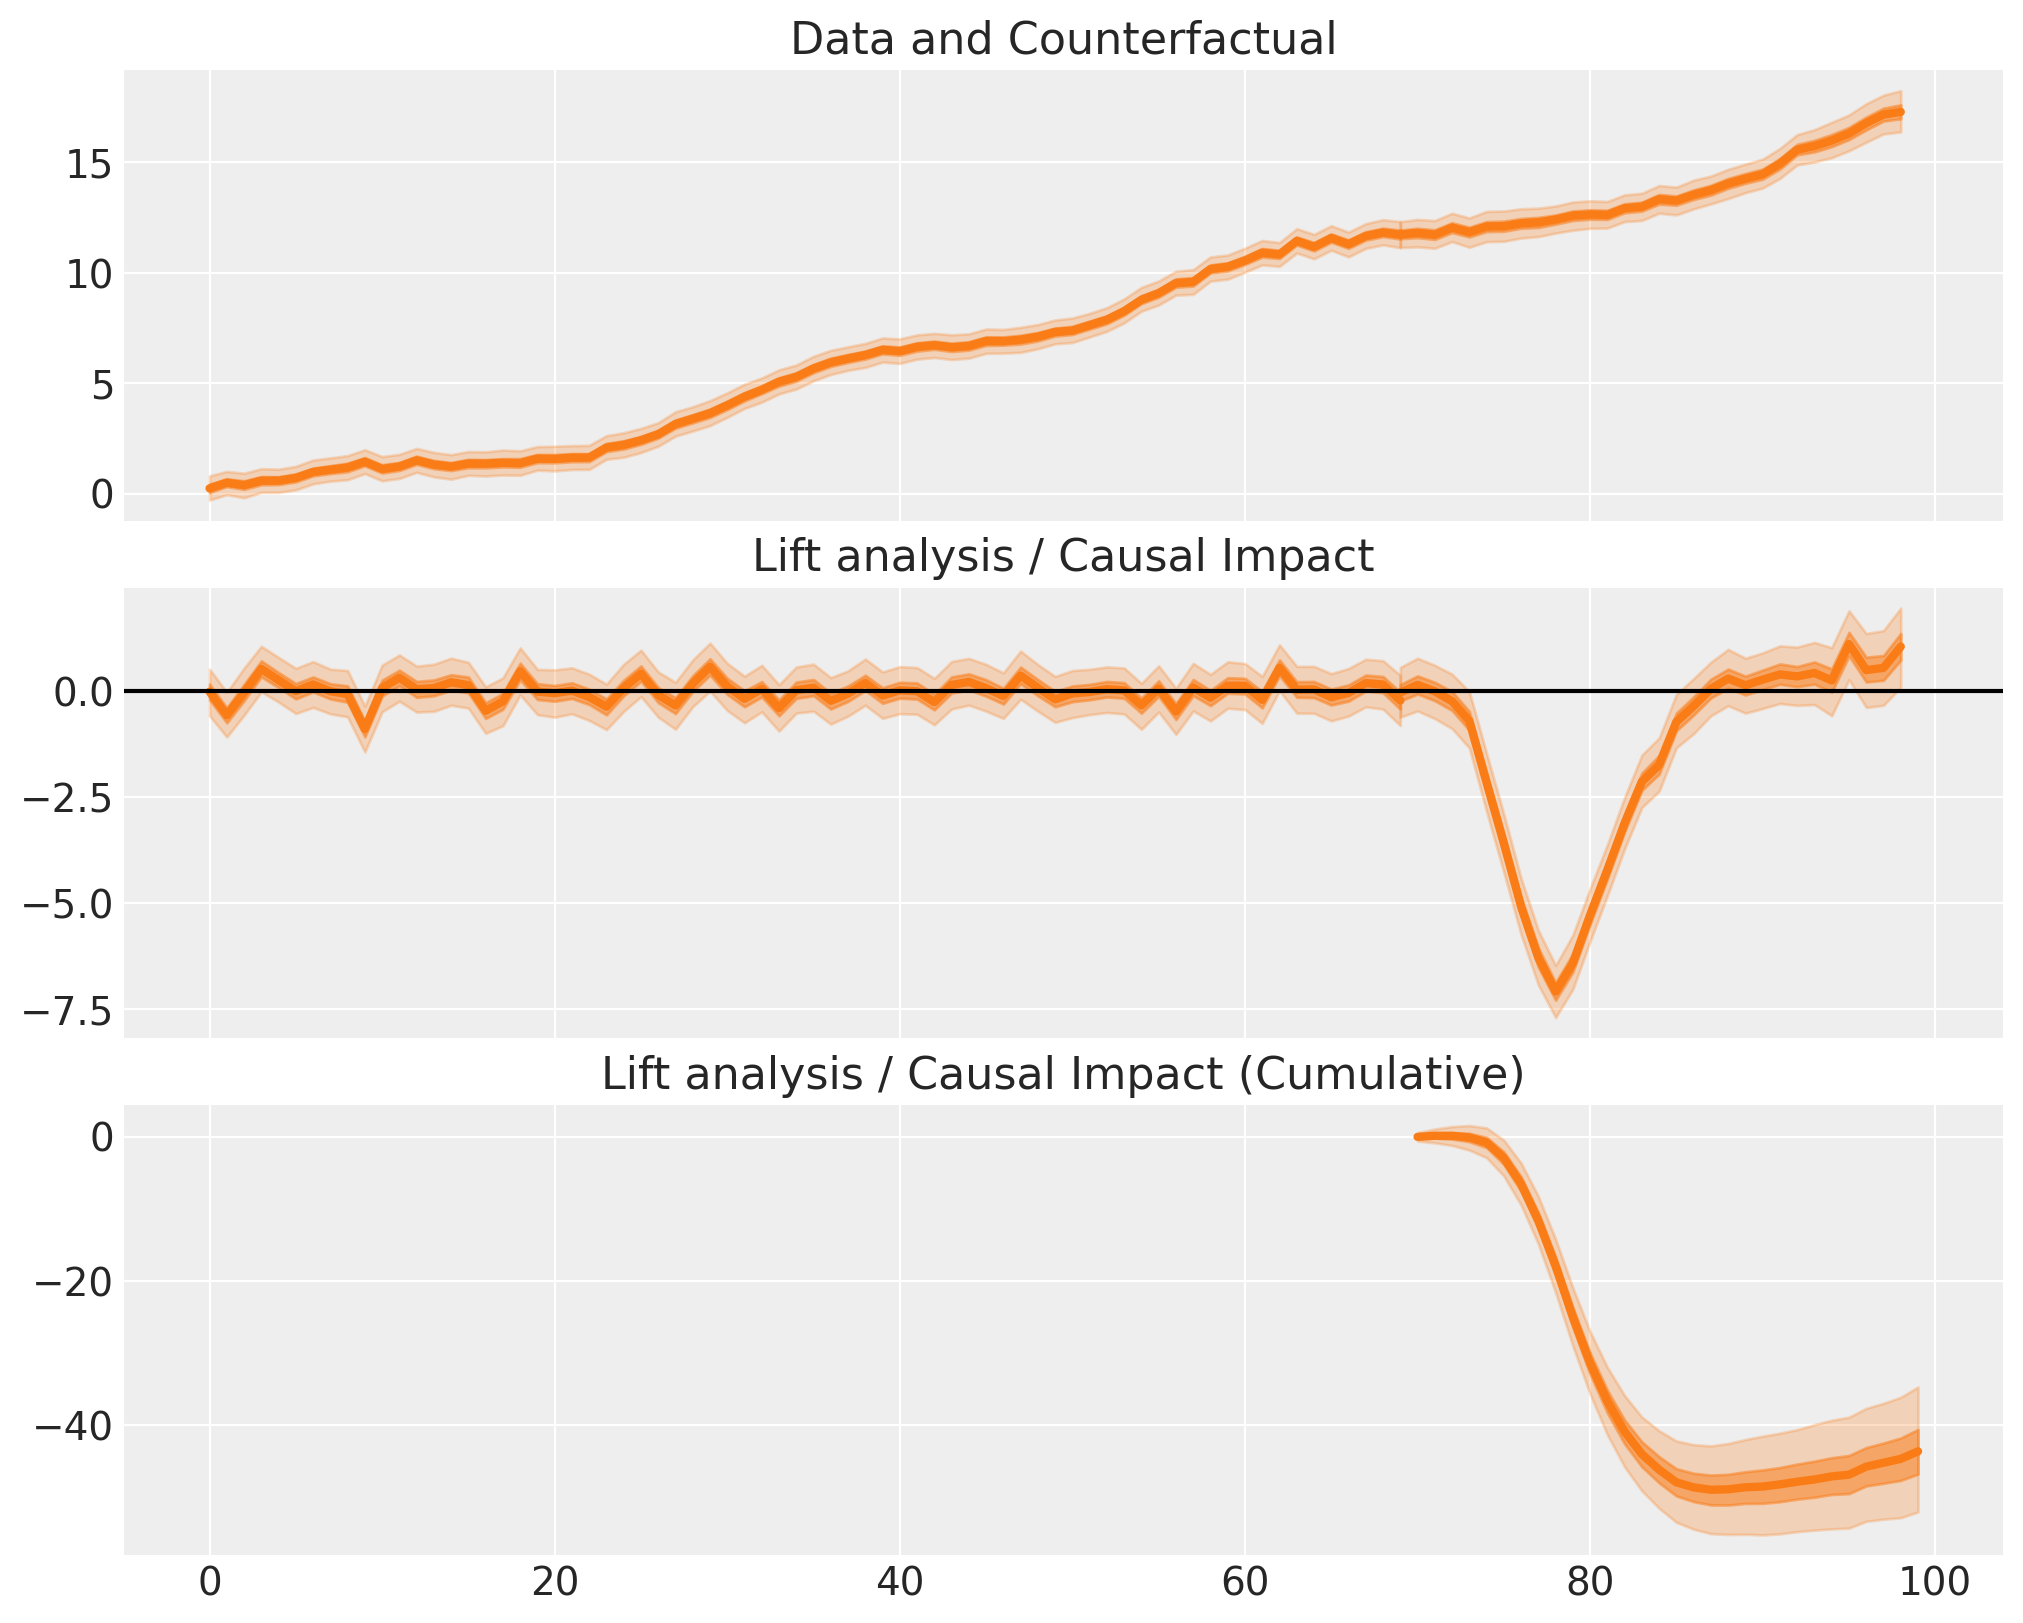

In [11]:
model.plot()

Visualise the posterior distributions of the variable weightings.

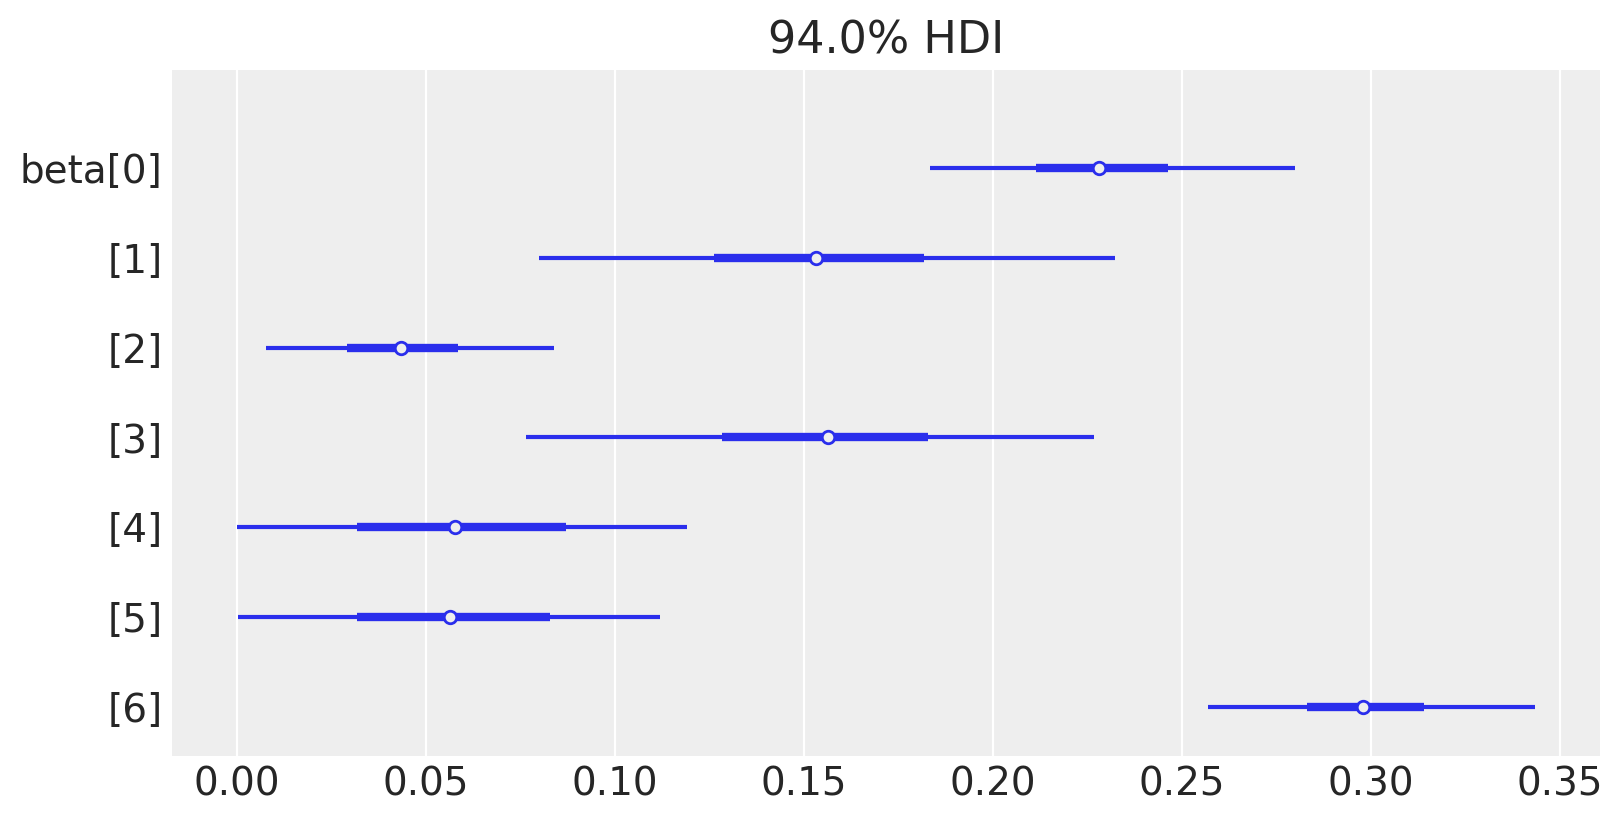

In [12]:
az.plot_forest(model.idata.posterior, var_names="beta", figsize=(8, 4), combined=True);

A similar plot of the posterior distributions of variable weightings, but this time with ground truth of the simulated data.

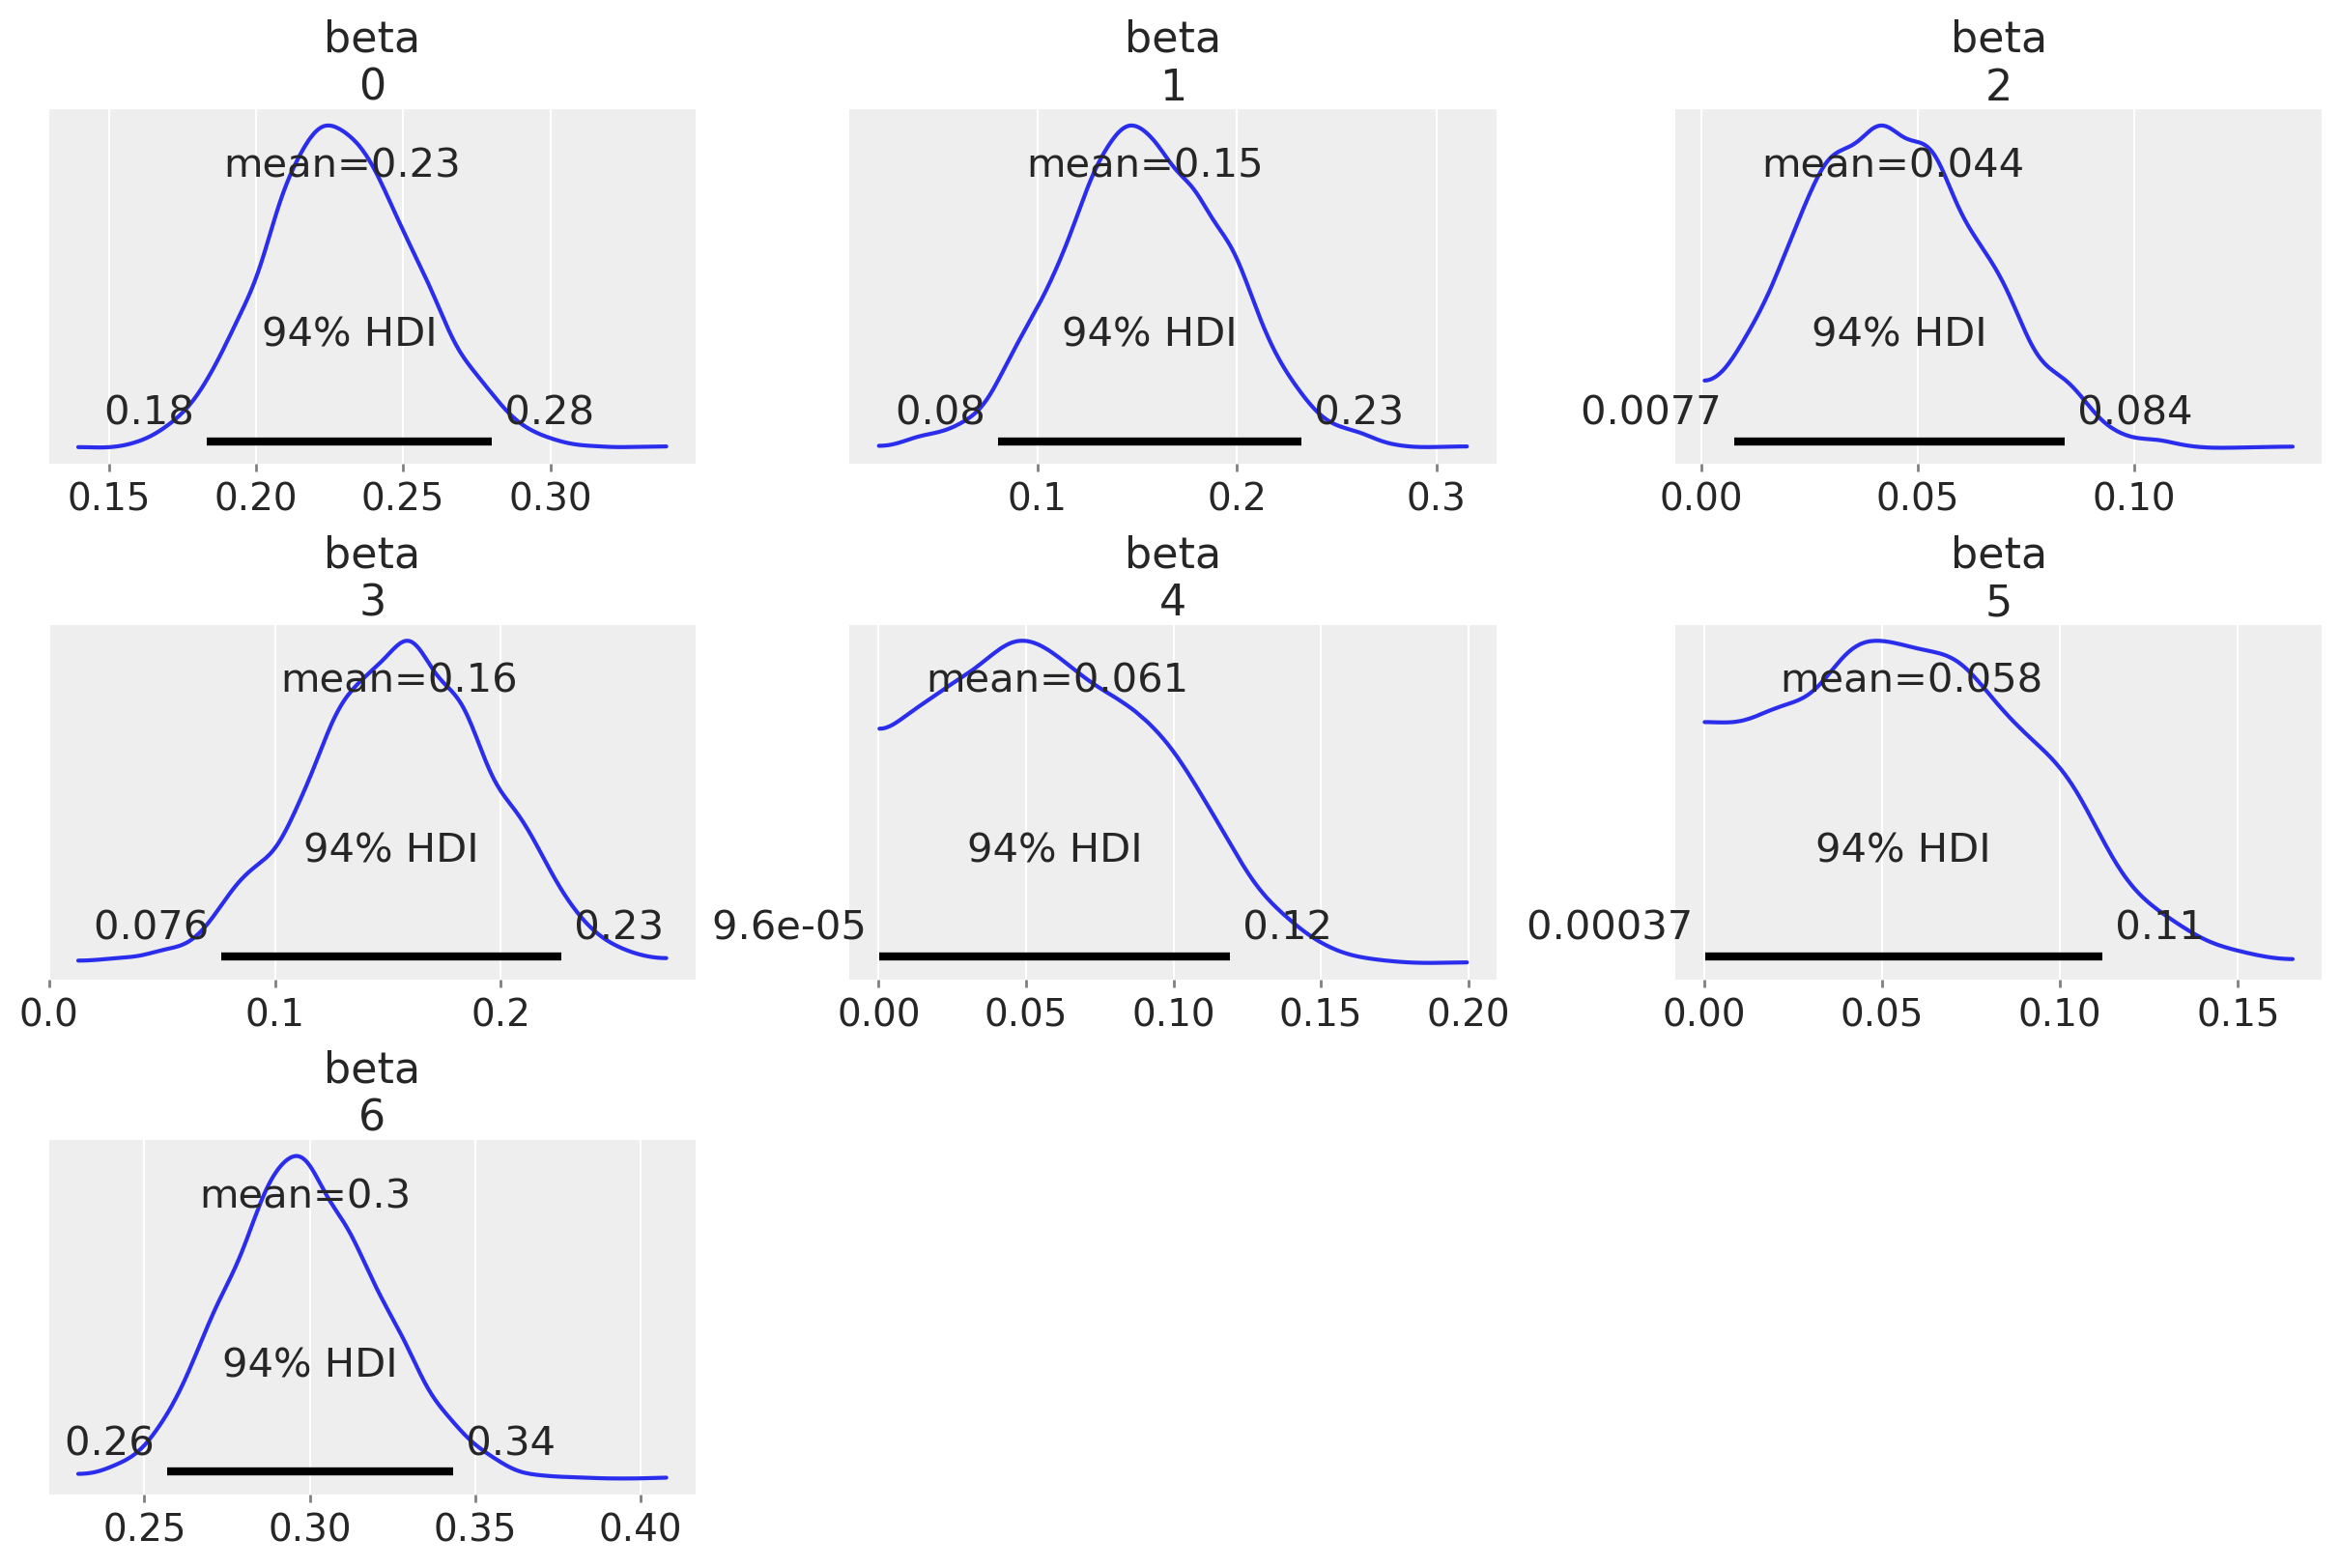

In [13]:
az.plot_posterior(model.idata.posterior['beta'], figsize=(12, 8));

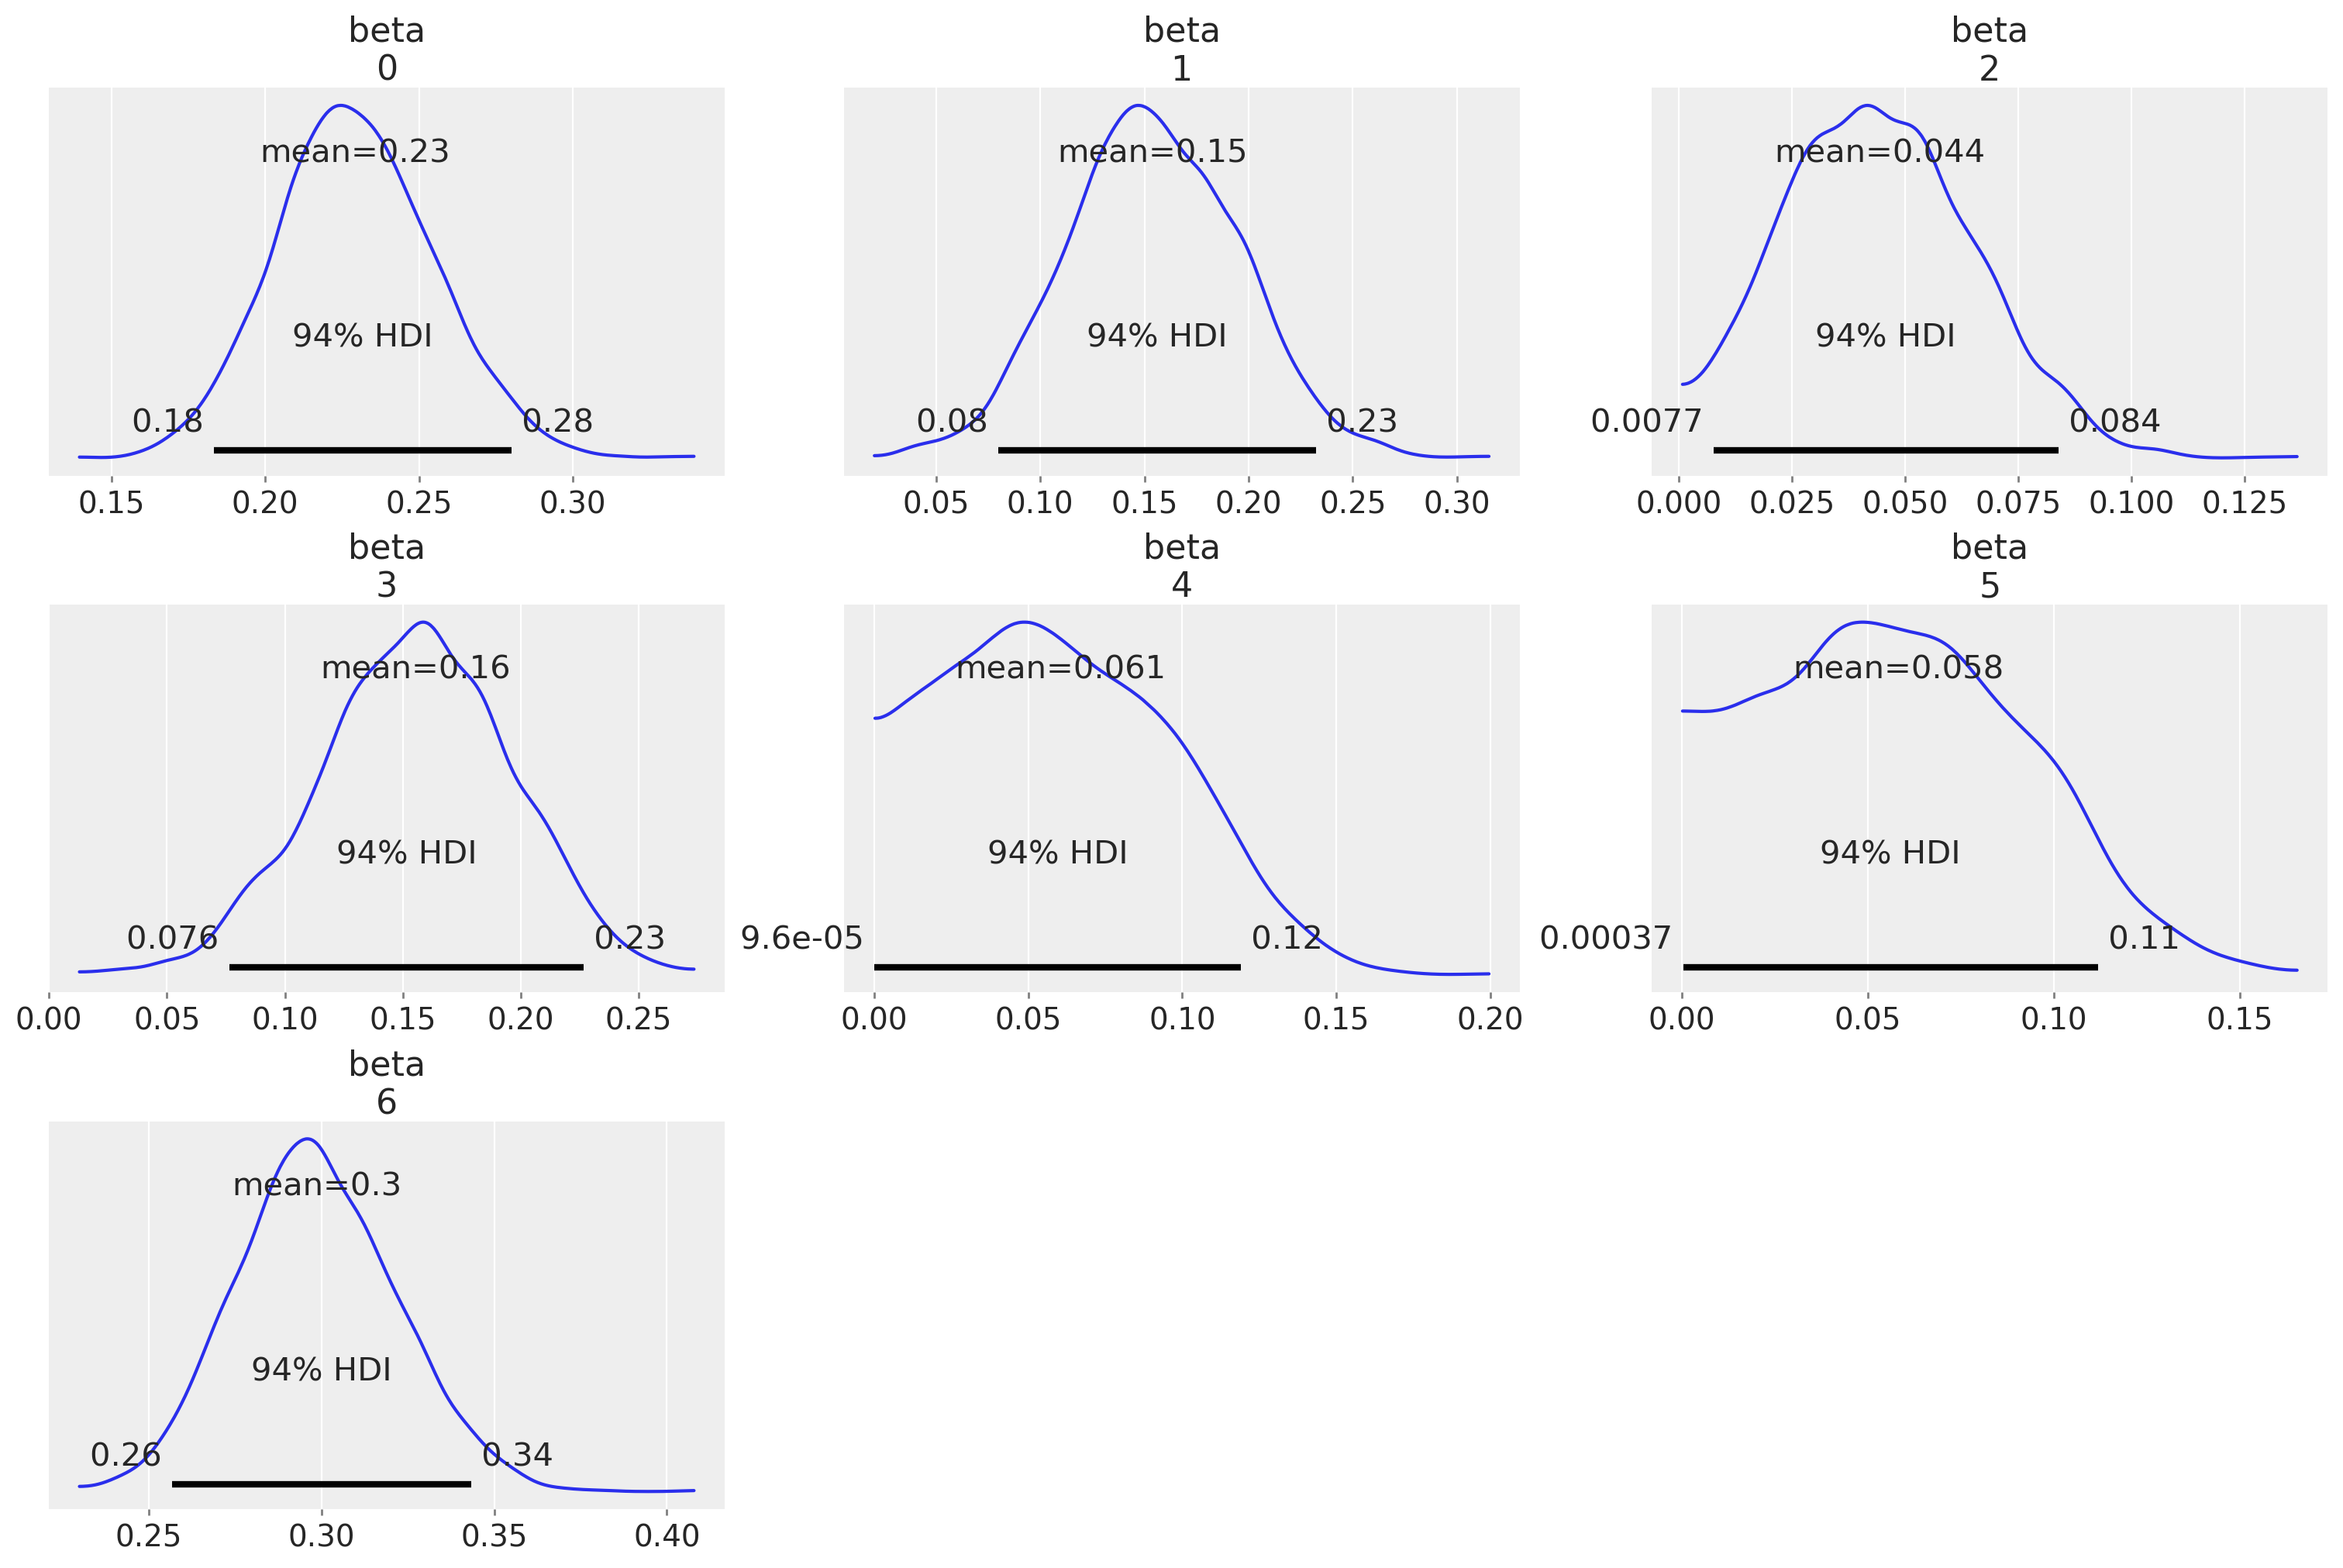

In [14]:
ref_val = {"beta": [{"predictors": "a", "ref_val": weightings_true[0][0]},
                    {"predictors": "b", "ref_val": weightings_true[0][1]},
                    {"predictors": "c", "ref_val": weightings_true[0][2]},
                    {"predictors": "d", "ref_val": weightings_true[0][3]},
                    {"predictors": "e", "ref_val": weightings_true[0][4]},
                    {"predictors": "f", "ref_val": weightings_true[0][5]},
                    {"predictors": "g", "ref_val": weightings_true[0][6]}]}

az.plot_posterior(model.idata.posterior['beta'], ref_val=ref_val, figsize=(15, 10));